In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [15]:
df = pd.read_csv('HR_dummies.csv')

In [16]:
import pickle

with open('train_test_split.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [17]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)

In [19]:
y_pred = rf_model.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
roc_auc_score(y_test, y_pred)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.95       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399

Matriz de confusión:
[[1997    4]
 [  31  367]]


0.9600557761320345

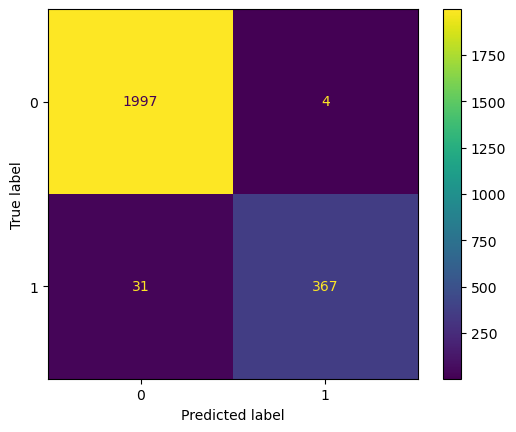

In [20]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

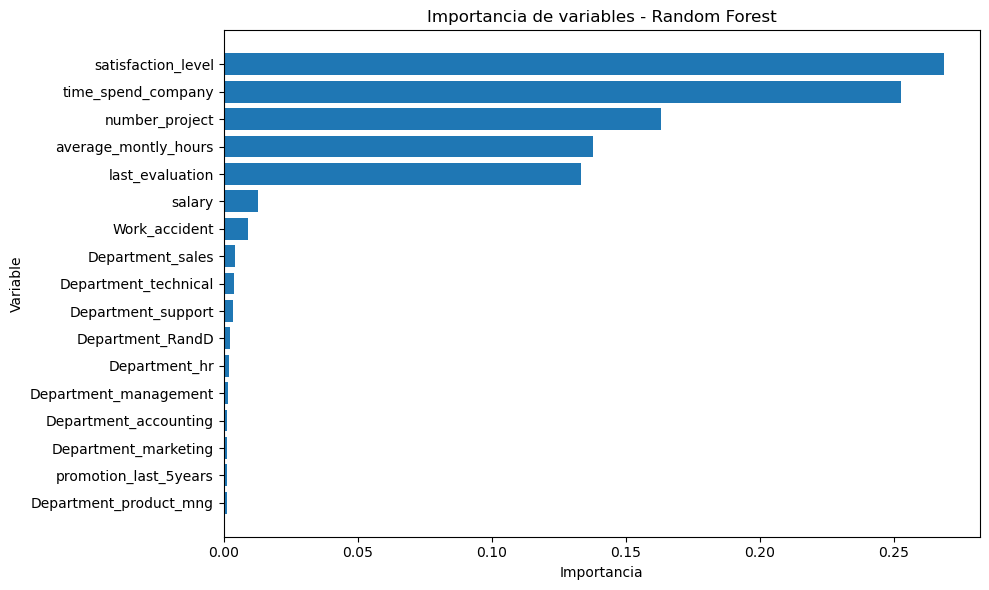

In [21]:
importancias = rf_model.feature_importances_
columnas = X_train.columns

df_importancia = pd.DataFrame({
    'feature': columnas,
    'importance': importancias
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_importancia['feature'], df_importancia['importance'])
plt.gca().invert_yaxis()
plt.title("Importancia de variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [ ]:
# Cargar la predicción
y_pred_logistic = pd.read_csv("y_pred_logistic.csv").squeeze()

In [24]:
# Crear tabla de comparación
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'F1': [
        f1_score(y_test, y_pred_logistic),
        f1_score(y_test, y_pred)
    ],
    'Recall': [
        recall_score(y_test, y_pred_logistic),
        recall_score(y_test, y_pred)
    ],
    'Precision': [
        precision_score(y_test, y_pred_logistic),
        precision_score(y_test, y_pred)
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_logistic),
        accuracy_score(y_test, y_pred)
    ]
})

# Redondear resultados
comparison_table = comparison_table.round(4)

# Mostrar tabla
comparison_table

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.5623,0.8442,0.4216,0.7820
1,Random Forest,0.9545,0.9221,0.9892,0.9854


In [26]:
comparison_table = pd.DataFrame({
    'Model': ['Random Forest'],
    'F1': [f1_score(y_test, y_pred)],
    'Recall': [recall_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred)],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'AUC': [roc_auc_score(y_test, y_pred)]
})

comparison_table = comparison_table.round(4)

comparison_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Random Forest,0.9545,0.9221,0.9892,0.9854,0.9601
